# 1. Linear Regression
#####  - poly regression
#####  - Regularized regression


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# **Linear Regression**

### 아이스크림 판매량 예측


In [3]:
temperature = [30,32,34,36]
sale = [10,20,30,40]

<AxesSubplot:>

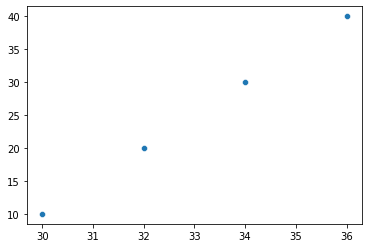

In [4]:
sns.scatterplot(x = temperature, y = sale)

## 수식

#연립 방정식으로 풀 수 있다.\
$ 30 * x_1 + b = 10 $ \
$ 32 * x_1 + b = 20 $ \
$ 34 * x_1 + b = 30 $ \
$ 38 * x_1 + b = 40 $ 

$ sale = 5 * temperature - 140 $




## mean square error (object function or loss function)
$
\||y-\mathbf{x}𝚹||^2 .
$

## 편미분
$
(-2)\mathbf{x}^T(y-\mathbf{x}\hat{𝚯}) = 0.
$

$
\mathbf{x}^T\mathbf{x}\hat{𝚯} = \mathbf{x}^Ty .
$

$
\hat{𝚯} = (\mathbf{x}^T\mathbf{x})^{-1}\mathbf{x}^Ty .
$

In [5]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

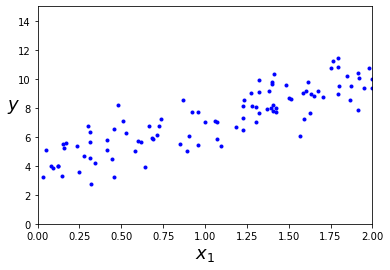

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[3.99590157],
       [3.06527004]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99590157],
       [10.12644164]])

In [10]:
X_new

array([[0],
       [2]])

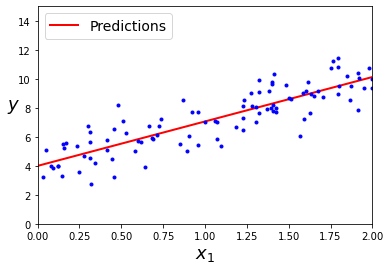

In [11]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99590157]), array([[3.06527004]]))

In [13]:
lin_reg.predict(X_new)

array([[ 3.99590157],
       [10.12644164]])

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.99590157],
       [3.06527004]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[3.99590157],
       [3.06527004]])

# **Polynomial Regression**(비선형)

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
print(X)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

[[-2.04864154]
 [ 2.49630815]
 [ 1.5016502 ]
 [ 1.13829298]
 [ 2.06914121]
 [-0.05924071]
 [ 1.61110405]
 [-1.10207187]
 [-1.7567181 ]
 [ 0.79012921]
 [-2.49438893]
 [ 2.19487626]
 [ 0.09119713]
 [-2.85179719]
 [-0.50291454]
 [ 2.74966057]
 [-0.37795779]
 [ 2.30319442]
 [-0.73830084]
 [-1.1671218 ]
 [ 1.4662105 ]
 [ 1.4673275 ]
 [ 0.25512476]
 [-1.34269729]
 [-0.02717801]
 [ 0.73531721]
 [-0.24549779]
 [-0.68226212]
 [ 1.71148161]
 [ 1.59087447]
 [ 1.22870774]
 [ 2.76546147]
 [ 2.59505614]
 [ 0.58278263]
 [ 1.30805816]
 [ 2.28588559]
 [-1.90977203]
 [-0.27754546]
 [-0.59551318]
 [-0.36823499]
 [-1.55199398]
 [ 1.95815817]
 [ 1.32312265]
 [ 2.2950424 ]
 [-0.0469822 ]
 [ 2.90688749]
 [-1.78240307]
 [-1.98171827]
 [ 2.18449323]
 [-0.94263354]
 [ 2.70867318]
 [-2.36352534]
 [ 1.60465085]
 [-0.43372148]
 [-1.61808805]
 [-0.48859925]
 [ 0.21846696]
 [ 1.66276709]
 [-2.33456929]
 [-2.58135068]
 [-2.85596207]
 [ 0.25108614]
 [ 0.40604567]
 [ 1.31452385]
 [-0.88088194]
 [ 1.89678321]
 [ 1.53629

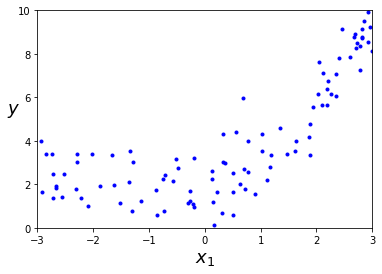

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.93187813])

In [ ]:
X_poly[0]

array([-2.93187813,  8.59590938])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9326696]), array([[0.99165946, 0.48476612]]))

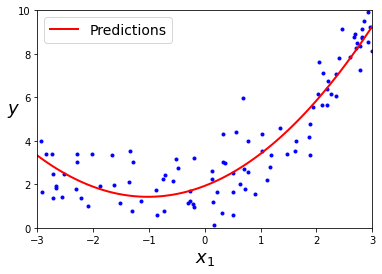

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

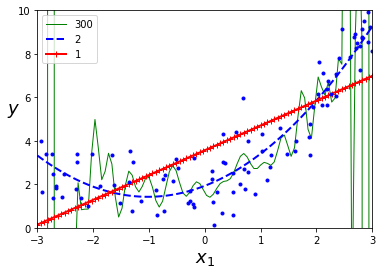

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

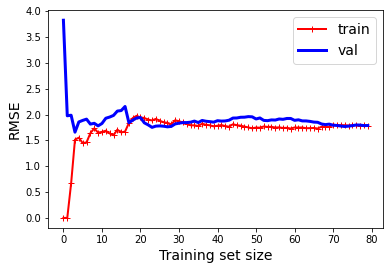

In [ ]:
plot_learning_curves(polynomial_regression,X,y)

# **Regularized Linear Models**

### 4.5.1 릿지 회귀 (Ridge Regression)

**릿지 회귀**(또는 티호노프 규제)는 규제(regularization)가 추가된 선형 회귀 모델이다. 규제항(regularization term) $\lambda \sum_{i=1}^{n}{w_{i}^{2}}$ 이 비용함수(loss function)에 추가된다.

따라서, 모델(알고리즘)을 데이터에 적합 시키는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 한다. 규제항은 학습에만 사용되며 테스트 시에는 규제항이 사용되지 않는다.

$$
J(w) = \text{MSE}(w) + \lambda \sum_{i=1}^{n}{w_{i}^{2}}
$$

위의 식에서 $\lambda$는 하이퍼파라미터이며, 모델을 얼마나 많이 규제할지 조절한다. $\lambda = 0$이면 릿지 회귀는 일반 선형 회귀와 같아지며, $\lambda$가 커지게되면 모든 가중치가 거의 0에 가까워져, 결국 데이터의 평균을 지나는 선이 된다.

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 데이터 스케일을 맞춰주는것이 중요하다.

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

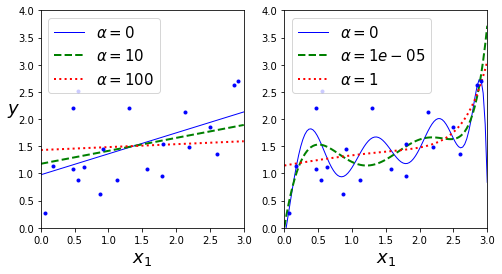

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()